In [5]:
from sympy import *
init_printing() # in aktuellen Versionen nicht mehr nötig
from fractions import Fraction
import math

Bei der Division in Python ergeben sich **immer** Fließkommazahlen.  Das hatten wir bereits im ersten Semester.

In [6]:
4/2, type(4/2)

(2.0, float)

Durch Fließkommazahlen werden die eigentlich exakten Berechnungen von Computeralgebrasystemen "kontaminiert" und sind dann nicht mehr exakt:

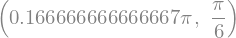

In [7]:
(1/6)*pi, pi/6

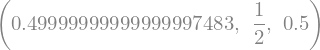

In [8]:
N(sin((1/6)*pi),20), sin(pi/6), N(sin(pi/6),20)

Aus Sicht der Informatik: Wie macht SymPy das eigentlich?

Auch wenn Zahlen bei der Ausgabe "normal" aussehen, können Sie intern als SymPy-Objekte gespeichert sein:

In [9]:
[(2*pi/pi, type(2*pi/pi)), (2, type(2))]

[(2, sympy.core.numbers.Integer), (2, int)]

Operatoren wie z.B. / (Division) werden von SymPy "überladen":  Ist mindestens einer der beiden Operanden ein SymPy-Objekt, dann wird die SymPy-Variante des Operators verwendet:

In [10]:
x, y = pi/pi, 1
L = [x/7, 7/x, y/7, 7/y]
list(map(lambda a: (a, type(a)), L))

[(1/7, sympy.core.numbers.Rational),
 (7, sympy.core.numbers.Integer),
 (0.14285714285714285, float),
 (7.0, float)]

Man kann mit der Funktion `sympify` aus normalen Python-Zahlen SymPy-Objekte machen:

In [11]:
x, y = sympify(3), 3
[(x, type(x)), (y, type(y))]

[(3, sympy.core.numbers.Integer), (3, int)]

`sympify` kann man auch Strings übergeben:

In [12]:
x, y = sympify('1/6'), 1/6
[(x, type(x)), (y, type(y))]

[(1/6, sympy.core.numbers.Rational), (0.16666666666666666, float)]

Aber warum klappt das hier nicht?

In [13]:
sympify(1/6)

Antwort: Python berechnet *erst* 1/6 und erst *danach* wird das Ergebnis (eine Fließkommazahl) an die Funktion `sympify` übergeben.  Dann ist es aber zu spät.  "Verpackt" man den Ausdruck in einem String (siehe oben), passiert das nicht.

SymPy kann auch mit `Fraction`-Objekten umgehen:

In [14]:
Fraction(1,6)*pi

Testfrage zwischendurch: Warum klappt das hier nicht?  (Sollten Sie aus dem ersten Semester noch wissen...)

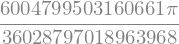

In [15]:
Fraction(1/6)*pi

Und warum klappt das hier nicht?

In [16]:
27**Fraction(1,3), type(27**Fraction(1,3))

(3.0, float)

Antwort: Weder 27 noch `Fraction(1,3)` sind SymPy-Objekte.  Also tritt der oben beschriebene Mechanismus des Überladens nicht in Kraft.  Die folgenden Versionen klappen aber alle.  (`Rational` ist quasi die SymPy-Version von `Fraction`.)

In [17]:
sympify(27)**Fraction(1,3),\
27**sympify(Fraction(1,3)),\
27**sympify('1/3'),\
27**Rational(1,3),\
sympify('27**(1/3)'),\

SyntaxError: incomplete input (4271680096.py, line 5)

Was passiert, wenn man `N` oder `evalf` verwendet?  (Die beiden Funktionen sind übrigens äquivalent.  Siehe Fußnote 4 auf Seite 243 im Buch.)

In [ ]:
[(N(pi), type(N(pi))), (float(pi), type(float(pi)))]

[(3.14159265358979, sympy.core.numbers.Float), (3.141592653589793, float)]

Diese Funktionen wandeln den Ausdruck in eine Fließkommazahl um.  Es handelt sich allerdings nicht um den normalen `float`-Typ von Python, weil SymPy mit beliebig hoher Genauigkeit arbeiten kann.  Daher kann man diese Objekte ggf. nicht in 64 Bit unterbringen.

In [ ]:
N(pi, 20)

Aber auch die SymPy-Fließkommazahlen "kontaminieren" die Rechnung.  Wenn Sie einmal irgendwo gerundet haben, schleppen Sie den Fehler danach mit sich rum.  (Merkregel: Sowas wie `N` oder `evalf` immer nur ganz am Ende einer ansonsten exakten Rechnung ausführen.)

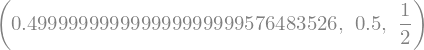

In [ ]:
N(sin(N(pi/6,20)),30), N(sin(pi/6),30), sin(pi/6)

Und wie rechnet man nun beispielsweise die 16. Nachkommastelle von $\sqrt{5/13}$ aus?

In [ ]:
math.sqrt(5/13),\
sqrt(5/13),\
N(sqrt(5/13),17),\
N(sympify('sqrt(5/13)'),16),\
N(sympify('sqrt(5/13)'),17)

Antwort: Nur die letzte Variante ist korrekt.  Die zweite zeigt nicht genügend Nachkommastellen an und warum die erste und die dritte falsch sind, sollte inzwischen klar sein.  Aber warum ist die vorletzte auch falsch?  SymPy hat hier korrekt *gerundet*.  Aber die 16. Nachkommastelle ist 2 und nicht 3.  Darum muss man sich mindestens eine Stelle mehr anschauen.

Das hier hätte natürlich auch geklappt:

In [7]:
N(sqrt(sympify('5/13')),17),\
N(sqrt(Fraction(5,13)),17),\
N(sqrt(Rational(5,13)),17)

In [8]:
sqrt(8)

In [10]:
x = symbols('x')

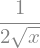

In [14]:
diff(sqrt(x))

In [15]:
solve(1/2*x**3-5*x)

Markdown in LaTeX mit zwei $ beginnen und enden: $$ e^{i\pi}+1=0$$